In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


array([[142, 181, 254, ..., 254, 254, 254],
       [142, 181, 254, ..., 254, 254, 254],
       [142, 181, 254, ..., 254, 254, 254],
       ...,
       [142, 186, 252, ..., 254, 254, 254],
       [143, 184, 251, ..., 255, 252, 249],
       [143, 184, 251, ..., 255, 252, 249]], dtype=uint8)
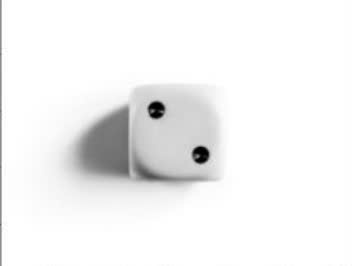

In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

iname = "/content/drive/MyDrive/Report_ImageProgress_Nhóm8/VuHoaBinh_21106541/dice.jpg"

image = cv2.imread(iname, cv2.IMREAD_GRAYSCALE)

if image is None:
 print("Could not open the image")
image

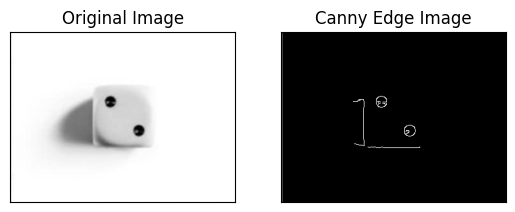

In [7]:
## canny
edges = cv2.Canny(image,100,200)

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('CannyEdge Image'), plt.xticks([]), plt.yticks([])

plt.show()

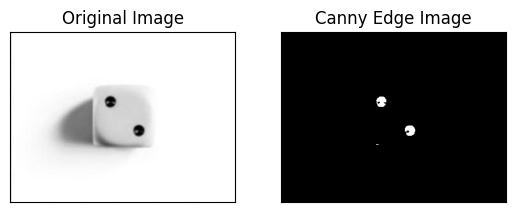

In [15]:
## Threshold
# ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret, thresholded = cv2.threshold(image, 80, 255, cv2.THRESH_BINARY_INV)

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresholded,cmap = 'gray')
plt.title('Threshold Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


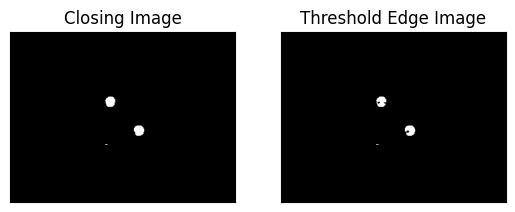

In [31]:
## closing: Xóa chỗ trắng còn xót các chấm đen
# array([[0, 0, 1, 0, 0],
#    [1, 1, 1, 1, 1],
#    [1, 1, 1, 1, 1],
#    [1, 1, 1, 1, 1],
#    [0, 0, 1, 0, 0]], dtype=uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
plt.subplot(122),plt.imshow(thresholded,cmap = 'gray')
plt.title('Threshold Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(121),plt.imshow(closing,cmap = 'gray')
plt.title('Closing Image'), plt.xticks([]), plt.yticks([])

plt.show()


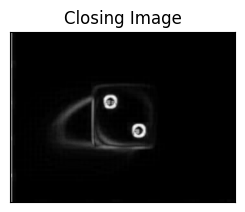

In [20]:
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

plt.subplot(121),plt.imshow(gradient,cmap = 'gray')
plt.title('Closing Image'), plt.xticks([]), plt.yticks([])
plt.show()

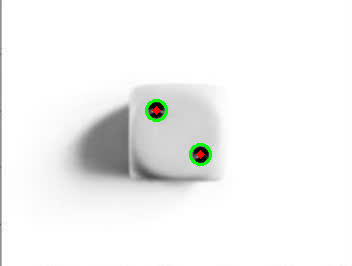

2


In [50]:
## Hough Circle
from google.colab.patches import cv2_imshow
cimg = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)


# Áp dụng ngưỡng Otsu để phân đoạn chấm trên xúc xắc
_, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# blurred = cv2.GaussianBlur(thresholded, (5, 5), 0) ## smooth pic
blurred = cv2.GaussianBlur(thresholded, (9, 9), 0) ## smooth pic
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.0, minDist=20,
                           param1=50, param2=30, minRadius=5, maxRadius=30)

circles = np.uint16(np.around(circles))

score = 0
for i in circles[0,:]:
  score +=1
  cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
  cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)
print(score)

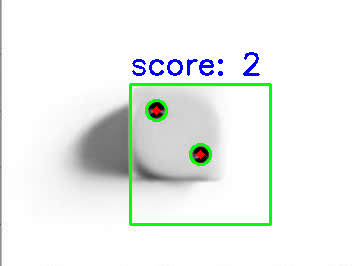

2


In [56]:
## Add green frame for a dice

from google.colab.patches import cv2_imshow
cimg = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)

# Áp dụng ngưỡng Otsu để phân đoạn chấm trên xúc xắc
_, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# blurred = cv2.GaussianBlur(thresholded, (5, 5), 0) ## smooth pic
blurred = cv2.GaussianBlur(thresholded, (9, 9), 0) ## smooth pic
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.0, minDist=20,
                           param1=50, param2=30, minRadius=5, maxRadius=30)
circles = np.uint16(np.around(circles))


x_min, y_min = np.min(circles[:, 0, :2], axis=0)
x_max, y_max = np.max(circles[:, 0, :2], axis=0)

margin = 70
x_min -= margin
y_min -= margin
x_max += margin
y_max += margin

cv2.rectangle(cimg, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)



score = 0
for i in circles[0, :]:
    score += 1
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

cv2.putText(cimg, f"score: {score}", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

cv2_imshow(cimg)
print(score)




array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)
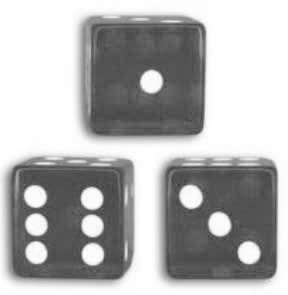

In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

iname = "/content/drive/MyDrive/Report_ImageProgress_Nhóm8/VuHoaBinh_21106541/dice2.jpg"

image = cv2.imread(iname, cv2.IMREAD_GRAYSCALE)

if image is None:
 print("Could not open the image")
image

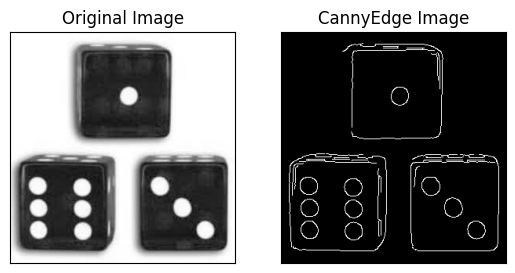

In [68]:
## canny
edges = cv2.Canny(image,100,200)

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('CannyEdge Image'), plt.xticks([]), plt.yticks([])

plt.show()

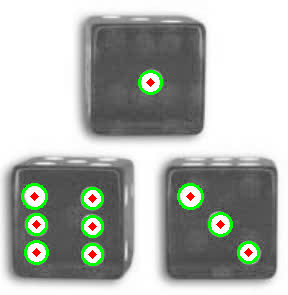

10


In [75]:
## Hough Circle
from google.colab.patches import cv2_imshow

cimg = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)


# Áp dụng ngưỡng Otsu để phân đoạn chấm trên xúc xắc
_, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# blurred = cv2.GaussianBlur(thresholded, (5, 5), 0) ## smooth pic
blurred = cv2.GaussianBlur(thresholded, (7, 7), 0) ## smooth pic
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.0, minDist=20,
                           param1=50, param2=30, minRadius=5, maxRadius=30)

circles = np.uint16(np.around(circles))

score = 0
for i in circles[0,:]:
  score +=1
  cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
  cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)
print(score)

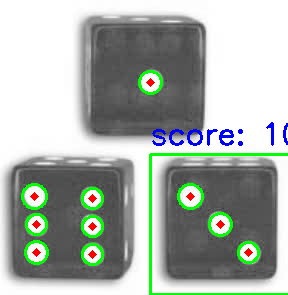

10


In [72]:
## Add green frame for a dice

from google.colab.patches import cv2_imshow
cimg = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)

# Áp dụng ngưỡng Otsu để phân đoạn chấm trên xúc xắc
_, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# blurred = cv2.GaussianBlur(thresholded, (5, 5), 0) ## smooth pic
blurred = cv2.GaussianBlur(thresholded, (7, 7), 0) ## smooth pic
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.0, minDist=20,
                           param1=50, param2=30, minRadius=5, maxRadius=30)
circles = np.uint16(np.around(circles))


x_min, y_min = np.min(circles[:, 0, :2], axis=0)
x_max, y_max = np.max(circles[:, 0, :2], axis=0)

margin = 70
x_min -= margin
y_min -= margin
x_max += margin
y_max += margin

cv2.rectangle(cimg, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)



score = 0
for i in circles[0, :]:
    score += 1
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

cv2.putText(cimg, f"score: {score}", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

cv2_imshow(cimg)
print(score)




## EX 2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
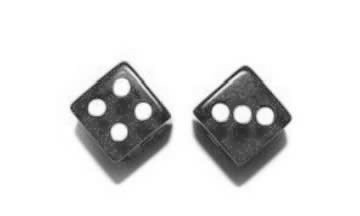

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

iname = "/content/drive/MyDrive/Report_ImageProgress_Nhóm8/VuHoaBinh_21106541/dice3.jpg"

image = cv2.imread(iname, cv2.IMREAD_GRAYSCALE)

if image is None:
 print("Could not open the image")
image

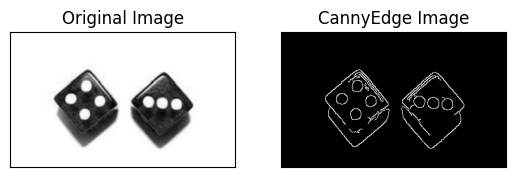

In [80]:
## canny
edges = cv2.Canny(image,100,200)

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('CannyEdge Image'), plt.xticks([]), plt.yticks([])

plt.show()

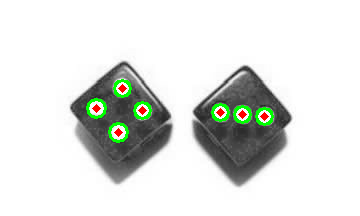

7


In [94]:
## Hough Circle
from google.colab.patches import cv2_imshow

cimg = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)


# Áp dụng ngưỡng Otsu để phân đoạn chấm trên xúc xắc
_, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# blurred = cv2.GaussianBlur(thresholded, (5, 5), 0) ## smooth pic
blurred = cv2.GaussianBlur(thresholded, (11, 11), 0) ## smooth pic
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.0, minDist=20,
                           param1=50, param2=20, minRadius=5, maxRadius=30)

circles = np.uint16(np.around(circles))

score = 0
for i in circles[0,:]:
  score +=1
  cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
  cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)
print(score)

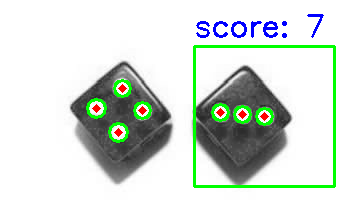

7


In [98]:
## Add green frame for a dice

from google.colab.patches import cv2_imshow
cimg = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)

# Áp dụng ngưỡng Otsu để phân đoạn chấm trên xúc xắc
_, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# blurred = cv2.GaussianBlur(thresholded, (5, 5), 0) ## smooth pic
blurred = cv2.GaussianBlur(thresholded, (11, 11), 0) ## smooth pic
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.0, minDist=20,
                           param1=50, param2=20, minRadius=5, maxRadius=30)
circles = np.uint16(np.around(circles))


x_min, y_min = np.min(circles[:, 0, :2], axis=0)
x_max, y_max = np.max(circles[:, 0, :2], axis=0)

margin = 70
x_min -= margin
y_min -= margin
x_max += margin
y_max += margin

cv2.rectangle(cimg, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)



score = 0
for i in circles[0, :]:
    score += 1
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

cv2.putText(cimg, f"score: {score}", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

cv2_imshow(cimg)
print(score)




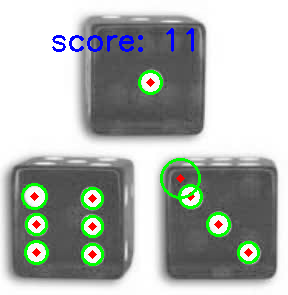

Best parameters: {'blur_size': (11, 11), 'param2': 20, 'min_radius': 5, 'max_radius': 20}
Number of dots detected: 11


In [103]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

cimg = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

_, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

blur_values = [(5, 5), (7, 7), (9, 9), (11, 11), (13, 13)]
param2_values = [20, 25, 30]
min_radius_values = [5, 10, 15]
max_radius_values = [20, 25, 30]

best_score = 0
best_params = {}

for blur_size in blur_values:
    for param2 in param2_values:
        for min_radius in min_radius_values:
            for max_radius in max_radius_values:
                blurred = cv2.GaussianBlur(thresholded, blur_size, 0)
                circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.0, minDist=20,
                                           param1=50, param2=param2, minRadius=min_radius, maxRadius=max_radius)

                if circles is not None:
                    circles = np.uint16(np.around(circles))
                    score = len(circles[0, :])

                    if score > best_score:
                        best_score = score
                        best_params = {
                            "blur_size": blur_size,
                            "param2": param2,
                            "min_radius": min_radius,
                            "max_radius": max_radius
                        }

blurred = cv2.GaussianBlur(thresholded, best_params['blur_size'], 0)
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.0, minDist=20,
                           param1=50, param2=best_params['param2'],
                           minRadius=best_params['min_radius'], maxRadius=best_params['max_radius'])

if circles is not None:
    circles = np.uint16(np.around(circles))
    score = 0
    for i in circles[0, :]:
        score += 1
        # Vẽ các chấm
        cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

    cv2.putText(cimg, f"score: {score}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

cv2_imshow(cimg)
print(f"Best parameters: {best_params}")
print(f"Number of dots detected: {best_score}")
